## Deforestation Analysis of Southern Tip of India Using Sentinel 2 images

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
plt.rcParams['image.cmap'] = 'gray'
from osgeo import gdal

In [ ]:
ds = gdal.Open('2018.tif')

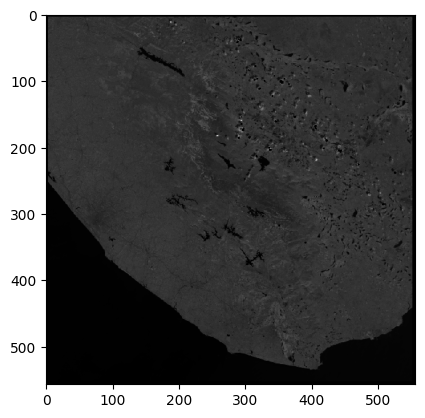

In [ ]:
plt.imshow(ds.GetRasterBand(8).ReadAsArray())

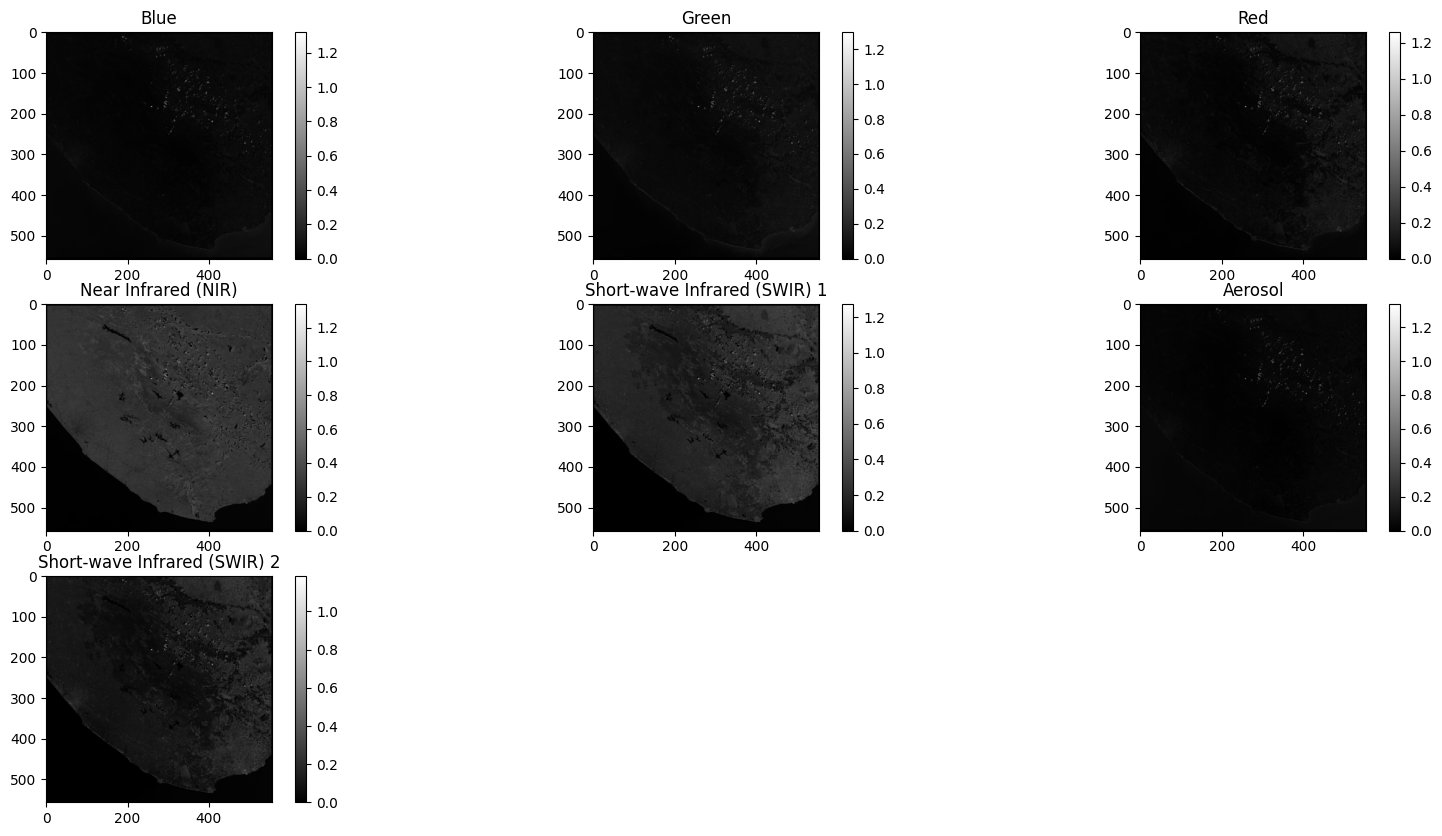

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(331); plt.imshow(ds.GetRasterBand(2).ReadAsArray()); plt.title("Blue"); plt.colorbar();
plt.subplot(332); plt.imshow(ds.GetRasterBand(3).ReadAsArray()); plt.title("Green"); plt.colorbar();
plt.subplot(333); plt.imshow(ds.GetRasterBand(4).ReadAsArray()); plt.title("Red"); plt.colorbar();
plt.subplot(334); plt.imshow(ds.GetRasterBand(8).ReadAsArray()); plt.title("Near Infrared (NIR)"); plt.colorbar();
plt.subplot(335); plt.imshow(ds.GetRasterBand(11).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 1"); plt.colorbar();
plt.subplot(336); plt.imshow(ds.GetRasterBand(1).ReadAsArray()); plt.title("Aerosol"); plt.colorbar();
plt.subplot(337); plt.imshow(ds.GetRasterBand(12).ReadAsArray()); plt.title("Short-wave Infrared (SWIR) 2"); plt.colorbar();

In [ ]:
def get_NDVI(ds):
    r = ds.GetRasterBand(4).ReadAsArray()
    nir = ds.GetRasterBand(8).ReadAsArray()
    ndvi = (nir - r)/(nir + r)
    ndvi = normalize255(ndvi)
    return ndvi

In [ ]:
def normalize255(ndvi):
    ndvi = ndvi + 1
    ndvi = (ndvi / 2) * 255
    return ndvi

In [ ]:
 def get_NDVI_mask(ndvi):
    _, mask = cv2.threshold(ndvi, 200, 255, cv2.THRESH_BINARY)
    return mask

In [ ]:
def percent_forest(mask):
    c = cv2.countNonZero(mask)
    t = mask.shape[0] * mask.shape[1]
    return round((c / t) * 100, 4)

In [ ]:
def plot_NDVI(path):
    ds = gdal.Open(path)
    ndvi = get_NDVI(ds)
    ndvi_mask = get_NDVI_mask(ndvi)

    year = path.split('.')[0][:4]
    fig = plt.figure(figsize = (20, 5))
    fig = plt.subplot(1, 2, 1)
    plot = plt.imshow(ndvi, cmap = "gray")
    plt.colorbar()
    plt.title(year + ": " + "NDVI")
    plt.xticks([]), plt.yticks([])
    fig = plt.subplot(1, 2, 2)
    plot = plt.imshow(ndvi_mask, cmap = "gray");
    plt.title(str(percent_forest(ndvi_mask)) + "%")
    plt.xticks([]), plt.yticks([])
    plt.show()

<ipython-input-6-affa861d5431>:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - r)/(nir + r)


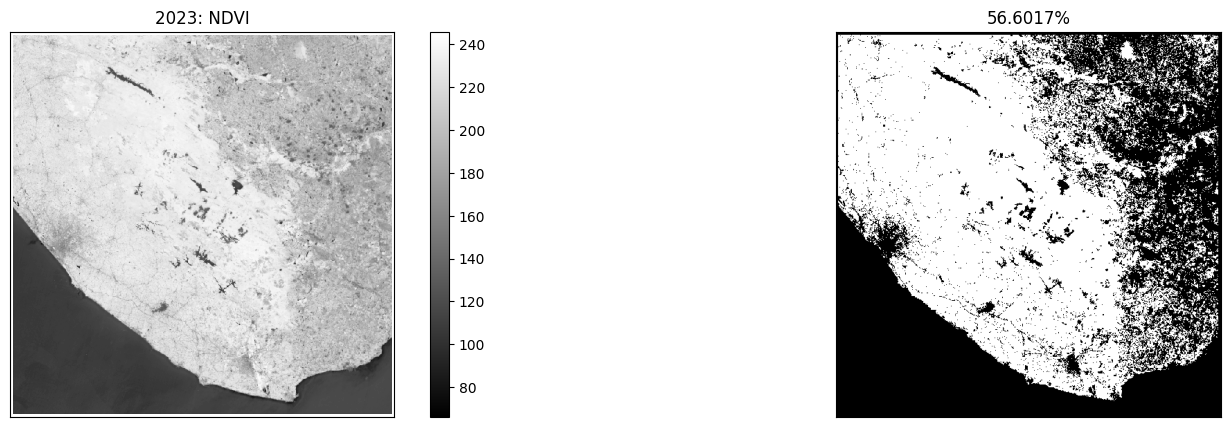

In [ ]:
plot_NDVI('2023.tif')

<ipython-input-6-affa861d5431>:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - r)/(nir + r)


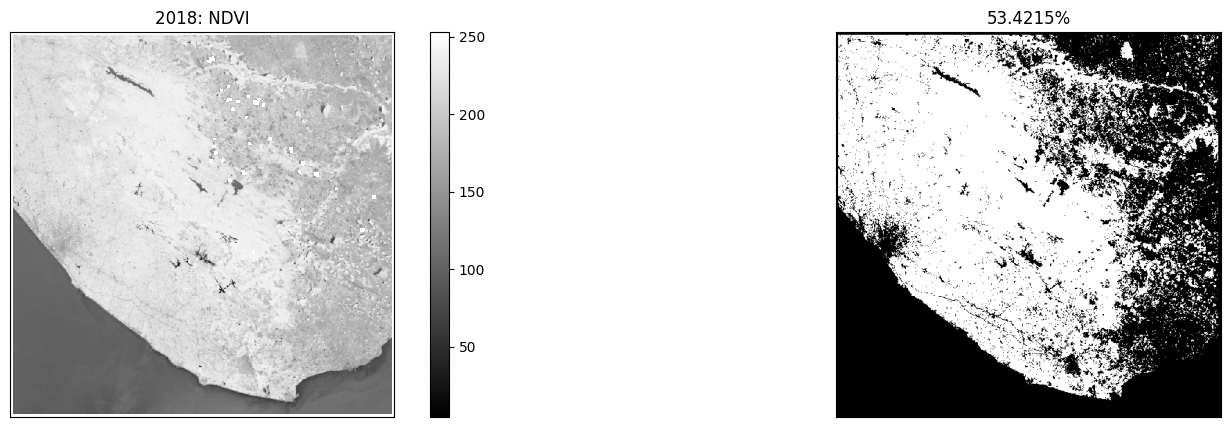

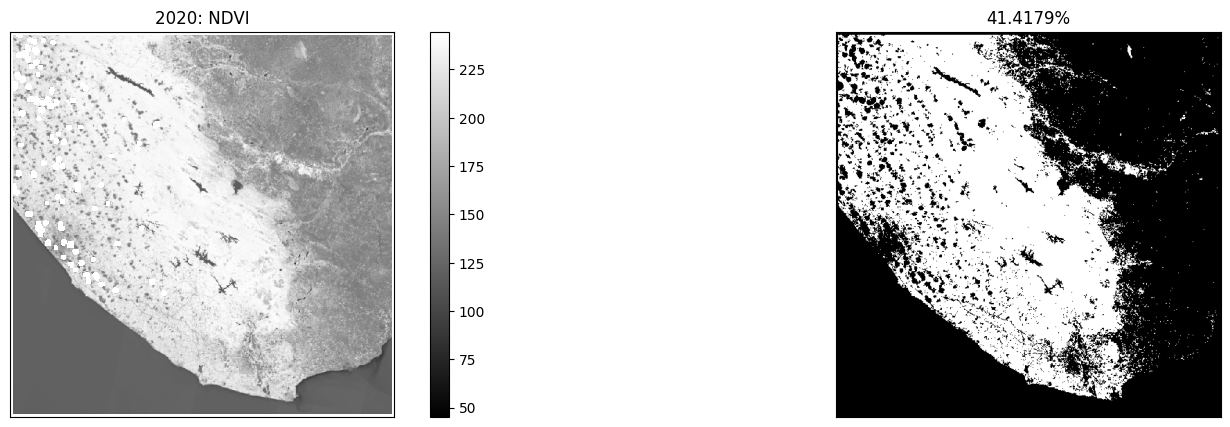

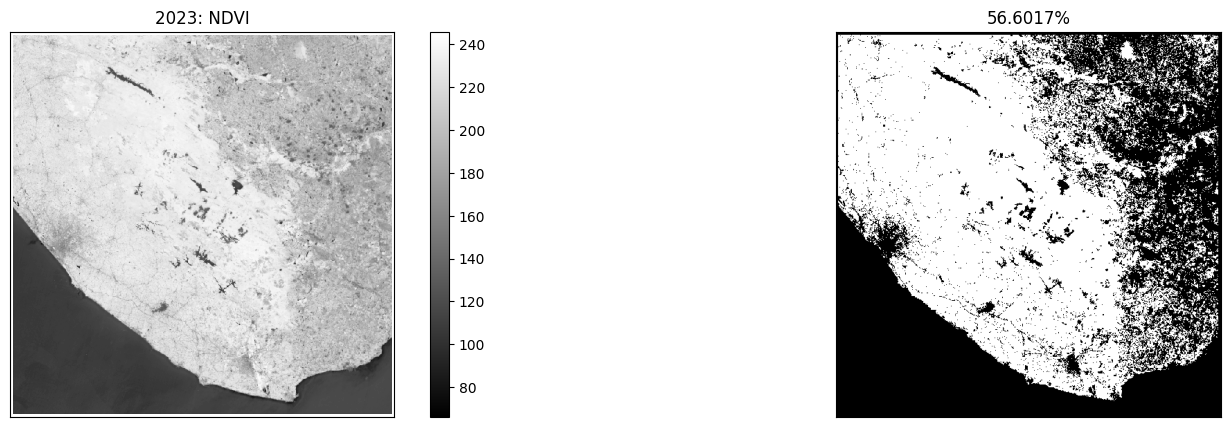

In [ ]:
geotiff_files = glob.glob("*.tif")
geotiff_files.sort()
for file in geotiff_files:
    plot_NDVI(file)